In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from __future__ import division

** Defining the Data **

In [2]:
Nclass=500
D=2#( No of Dimensions in the data)
M=3#(No of hidden layers)
K=3#(No of out put nodes)
alpha=10e-7

In [3]:
X1=np.random.randn(Nclass,D)+np.array([0,-2])
X2=np.random.randn(Nclass,D)+np.array([0,4])
X3=np.random.randn(Nclass,D)+np.array([4,2])
X=np.vstack([X1,X2,X3])
Y=np.array([0]*Nclass+[1]*Nclass+[2]*Nclass)

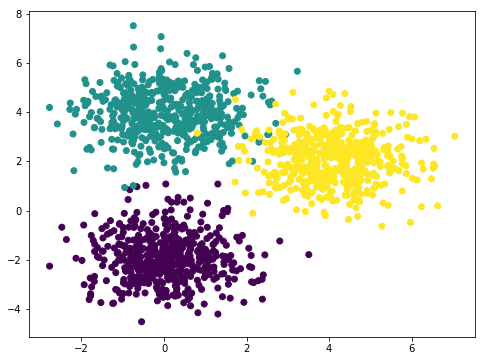

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y)

** Building a Feed forward network **

In [5]:
#Initialising the random weight
W= np.random.randn(D,M)
b=np.random.randn(1,M)
V=np.random.randn(M,K)
c=np.random.randn(1,K)

In [6]:
# Defining sigmoid function
def sigmoid_function(x):
    return(1/(1+np.exp(-x)))
vsigmoid_function=np.vectorize(sigmoid_function)

In [7]:
# Out put probabilities
Z=vsigmoid_function(X.dot(W)+b)
Y_Prob=np.exp(Z.dot(V)+c)/np.exp(Z.dot(V)+c).sum(axis=1,keepdims=True)

In [8]:
Y_Pred=np.argmax(Y_Prob,axis=1)

In [9]:
Acc=Y-Y_Pred
accuracy=len(Acc[Acc==0])/len(Acc)
print("Accuracy of the alorigthm is: %.2f"%(accuracy))

Accuracy of the alorigthm is: 0.00


** Creating the Back Propagation algorithm to update weigths**

In [10]:
T=np.zeros((Nclass*3,K))
for t in np.arange(len(Y)):
           T[t,Y[t]]=1

In [11]:
list_cost=[]
list_accuracy=[]
for epoch in np.arange(8000):
#Hidden to output weight updation
    V_delta=np.zeros((M,K))
    for i in np.arange(len(Y)):
        V_delta += np.transpose(vsigmoid_function(X[i,:].dot(W)+b)).dot((Y_Prob[i,:]-T[i,:]).reshape(1,K))

# Input to hidden layer
    W_delta=np.zeros((D,M))
    for i in np.arange(len(Y)):
        L=((V*(Y_Prob[i,:]-T[i,:])).sum(axis=1).reshape(1,M))*((Z[i]*(1-Z[i])).reshape(1,M))
        W_delta += (np.transpose(X[i]).reshape(D,1)).dot(L)

# Hidden to output bias
    c_delta=np.zeros((1,K))
    for i in np.arange(len(Y)):
        c_delta += Y_Prob[i,:]-T[i,:]
# Input to hidden bias
    b_delta=np.zeros((1,M))
    for i in np.arange(len(Y)):
        b_delta += ((V*(Y_Prob[i,:]-T[i,:])).sum(axis=1).reshape(1,M))*((Z[i]*(1-Z[i])).reshape(1,M))

#updating weights and bias
    V = V-(alpha*V_delta)
    W = W-(alpha*W_delta)
    c= c-(alpha*c_delta)
    b= b-(alpha*b_delta)
#calculating accuracy and cost
    Z=vsigmoid_function(X.dot(W)+b)
    Y_Prob=np.exp(Z.dot(V)+c)/np.exp(Z.dot(V)+c).sum(axis=1,keepdims=True)
    Y_Pred=np.argmax(Y_Prob,axis=1)
    Acc=Y-Y_Pred
    accuracy=len(Acc[Acc==0])/len(Acc)
    cost=-np.log((T*Y_Prob).sum(axis=1)).mean()
    list_accuracy.append(accuracy)
    list_cost.append(cost)

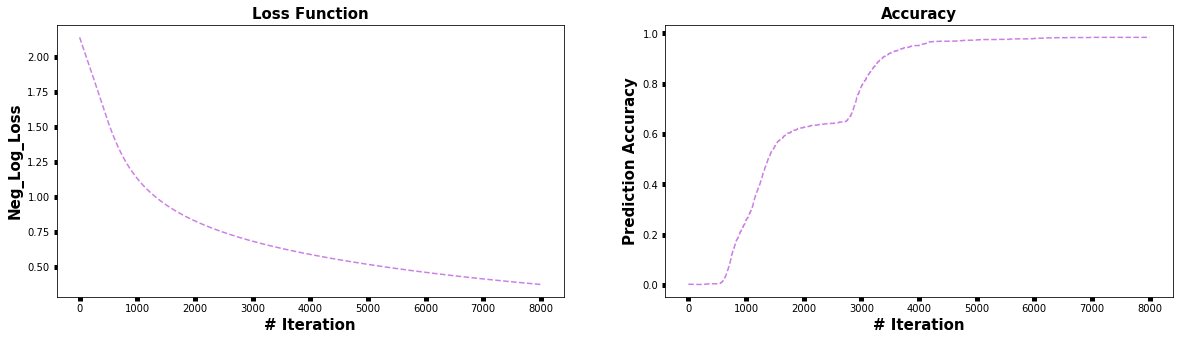

In [18]:
fig1=plt.figure(figsize=(20,5))
ax1=fig1.add_subplot(1,2,1)
ax1.plot(list_cost,color=(0.8,0.5,0.9),linestyle="--")
ax1.set_xlabel("# Iteration",fontsize=15,weight='bold')
ax1.set_ylabel("Neg_Log_Loss",fontsize=15,weight='bold')
ax1.set_title("Loss Function",fontsize=15,weight='bold')
ax1.tick_params(labelsize='medium',axis='both',width=5)
ax2=fig1.add_subplot(1,2,2)
ax2.plot(list_accuracy,color=(0.8,0.5,0.9),linestyle="--")
ax2.set_xlabel("# Iteration",fontsize=15,weight='bold')
ax2.set_ylabel("Prediction Accuracy",fontsize=15,weight='bold')
ax2.set_title("Accuracy",fontsize=15,weight='bold')
ax2.tick_params(labelsize='medium',axis='both',width=5)